['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'a

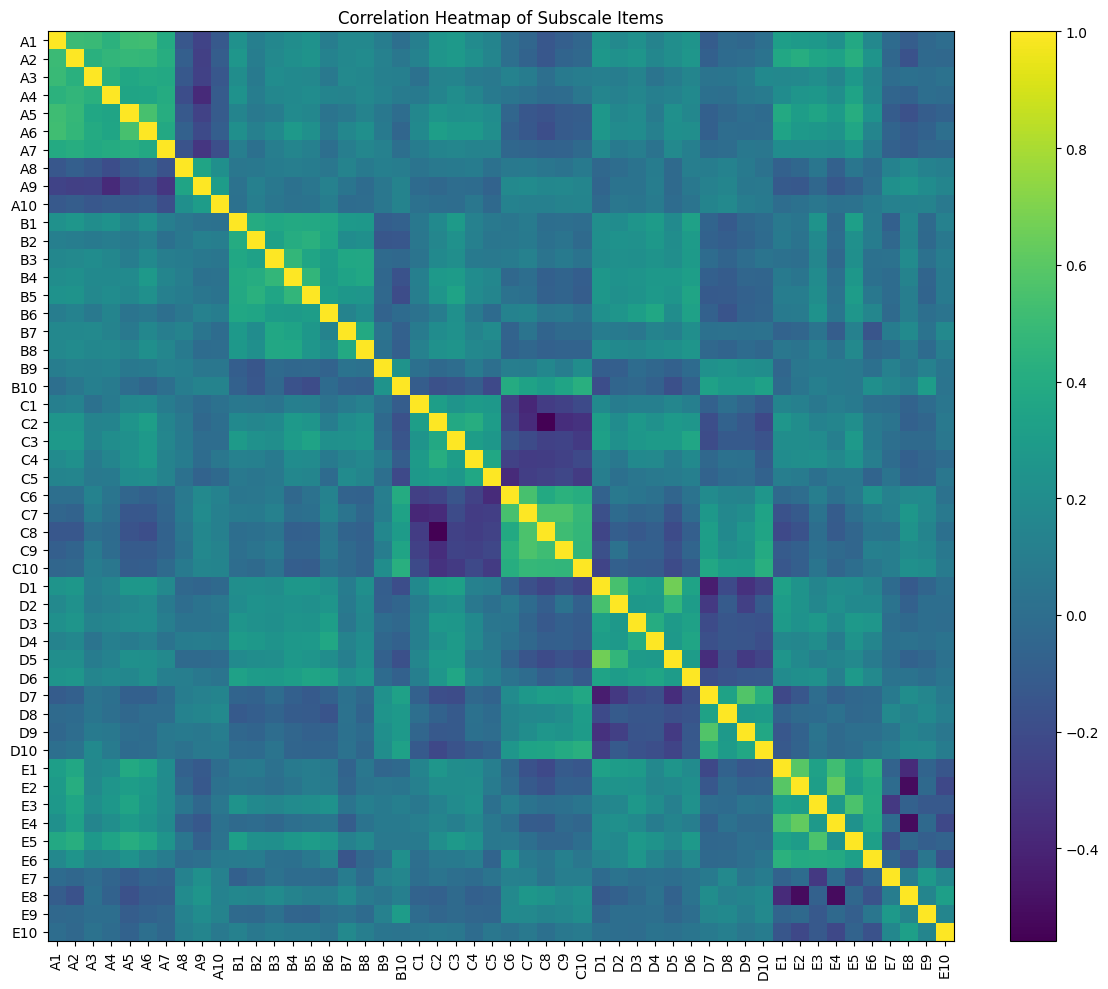

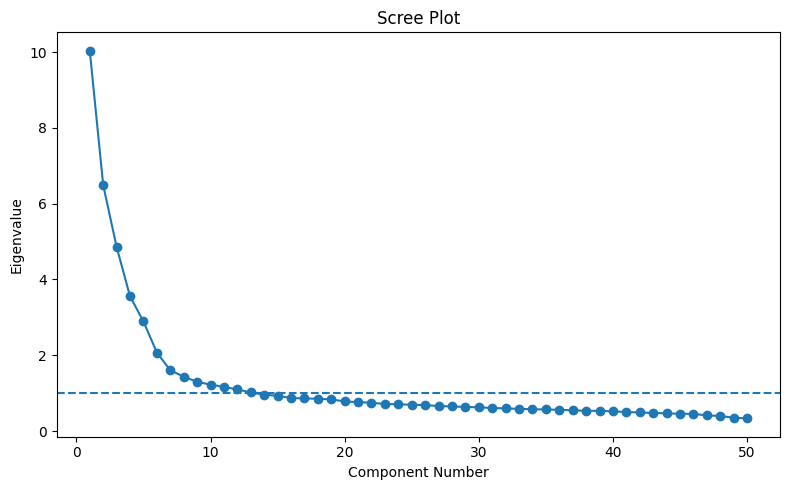

Number of factors (eigenvalue > 1): 13

Factor Loadings and Communalities:
      Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  \
A1  -0.632804 -0.306415 -0.144099 -0.289183 -0.229558 -0.139164  0.071039   
A2  -0.626992 -0.323262 -0.201860 -0.188576 -0.101341 -0.072368 -0.008531   
A3  -0.381356 -0.432606 -0.114725 -0.320929 -0.280495 -0.145859 -0.022006   
A4  -0.449964 -0.367471 -0.156510 -0.283522 -0.257671 -0.035359 -0.061699   
A5  -0.560562 -0.197238 -0.235687 -0.222289 -0.127549 -0.035046  0.172198   
A6  -0.558036 -0.189857 -0.103387 -0.281922 -0.082343 -0.102271  0.063579   
A7  -0.374296 -0.192773 -0.172382 -0.279239 -0.240604 -0.111564  0.008605   
A8   0.084479 -0.120322  0.300276  0.047972  0.482508 -0.024238  0.080929   
A9   0.245687 -0.126807  0.362832  0.267646  0.484224 -0.073684  0.101526   
A10  0.098273 -0.185162  0.144155  0.173336  0.392145 -0.035250  0.065273   
B1  -0.364424 -0.275311  0.392665 -0.065693 -0.042615  0.193172 -0.105294   
B

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, FactorAnalysis

# Read With Semicolon Separator
path = r"C:\RPI\Graduation Semester\Behavioral Data Science [PSYC 4961]\Homework\Homework 3\data.csv"
df = pd.read_csv(path, sep=';')

# Verify Columns
print(df.columns.tolist())

# Selecting Exactly A1–A10, B1–B10, C1–C10, D1–D10, E1–E10
subscale_items = [f"{scale}{i}" for scale in ["A","B","C","D","E"] for i in range(1,11)]
data = df[subscale_items]

# Imputing Missing Values With The Item Mean
imputer = SimpleImputer(strategy="mean")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=subscale_items)

# Correlation Heatmap Using Matplotlib
corr = data_imputed.corr()
plt.figure(figsize=(12,10))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap of Subscale Items")
plt.tight_layout()
plt.show()

# Scree Plot & Kaiser Criterion
pca = PCA()
pca.fit(data_imputed)
eigenvalues = pca.explained_variance_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.axhline(1, linestyle='--')
plt.xlabel("Component Number")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.tight_layout()
plt.show()

n_factors = int((eigenvalues > 1).sum())
print(f"Number of factors (eigenvalue > 1): {n_factors}")

# Running Factor Analysis
fa = FactorAnalysis(n_components=n_factors, random_state=0)
fa.fit(data_imputed)
loadings = pd.DataFrame(fa.components_.T, index=subscale_items,
                        columns=[f"Factor{i+1}" for i in range(n_factors)])
communalities = (loadings**2).sum(axis=1)

# Displaying Loadings and Communalities
fa_results = loadings.copy()
fa_results["Communality"] = communalities
print("\nFactor Loadings and Communalities:")
print(fa_results)

# Optionally, Save Results For Inspection
fa_results.to_csv("fa_results.csv")
print("\nResults saved to fa_results.csv")


## Do items belonging to the same subscale load highly on a single factor while showing minimal loadings on others?
A-items: A1–A2, A4–A7 load on Factor 1; A3 loads on Factor 2; A8–A10 load on Factor 5.

B-items: B1–B2, B3–B4, B6–B7 load on Factor 3; B5 & B8 load on Factor 1; B9–B10 load on Factor 2.

C-items: C1–C4 load on Factor 1; C6–C10 load on Factor 2; C5 loads on Factor 4.

D-items: D1–D6 load on Factor 1; D7–D10 load on Factor 2.

E-items: Spread across Factors 1, 2, 3, and 6.


Conclusion: Most subscales (A, B, C, D, and E) load on multiple factors, except B, which mostly loads on Factor 3.



## Which factor explains the most variance? 
Factor 1 explains the most variance, with the highest eigenvalue (~10), dominating the other factors.



# Which items should be removed (e.g., due to low loadings), if any?
Remove items with communalities < 0.40: (Variance in parenthesis)

A-items: A7 (0.37), A10 (0.26)

B-items: B3 (0.38), B4 (0.35), B8 (0.35)

D-items: D6 (0.37), D8 (0.29)

E-items: E9 (0.27), E10 (0.35)

Recommendation: Remove these 8 items and rerun the factor analysis.
